insert header

# Title

## Business Understanding and Business Problem

### Cost of Errors

## Data Understanding

In [2]:
#imports grabbed from lecture
from random import gauss as gs, uniform as uni, seed
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from surprise import Reader, Dataset

from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

### Initial Data

In [79]:
#the four csv files provided
links_df = pd.read_csv('data/links.csv')
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

In [80]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [81]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [82]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [83]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


## Exploratory Data Analysis

In [84]:
simple_ratings_df = ratings_df.drop('timestamp', axis=1)

In [85]:
simple_ratings_df.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [86]:
simple_ratings_df.info(), simple_ratings_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


(None,
 userId     0
 movieId    0
 rating     0
 dtype: int64)

In [87]:
# reader = Reader()
# data = Dataset.load_from_df(simple_ratings_df,reader)

In [88]:
# dataset = data.build_full_trainset()
# print('Number of users: ', dataset.n_users, '\n')
# print('Number of items: ', dataset.n_items)

## Modeling

In [89]:
# params = {'n_factors': [20, 50, 100],
#          'reg_all': [0.02, 0.05, 0.1]}
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
# g_s_svd.fit(data)

In [90]:
# print(g_s_svd.best_score)
# print(g_s_svd.best_params)

In [91]:
# # cross validating with KNNBasic
# knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
# cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

In [92]:

# for i in cv_knn_basic.items():
#     print(i)
# print('-----------------------')
# print(np.mean(cv_knn_basic['test_rmse']))

In [93]:
# # cross validating with KNNBaseline
# knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
# cv_knn_baseline = cross_validate(knn_baseline,data)

In [94]:
# for i in cv_knn_baseline.items():
#     print(i)

# np.mean(cv_knn_baseline['test_rmse'])

## SPLIT GENRE

In [95]:
movies_df.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [96]:
genres_df = movies_df[['movieId', 'genres']]
genres_df.head(1)

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy


In [97]:
genres_df['genres'][0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [98]:
genres_df['genres'][0]

'Adventure|Animation|Children|Comedy|Fantasy'

In [99]:

# # Split single column into two columns use apply()
# df[['First Name', 'Last Name']] = df["Student_details"].apply(lambda x: pd.Series(str(x).split(",")))
# print(df)


In [100]:
genres_df['split_genres'] = genres_df['genres'].iloc[0:].apply(lambda x: x.lower().split('|'))
genres_df.head()

,movieId,genres,split_genres
0,1,Adventure|Animation|Children|Comedy|Fantasy,"[adventure, animation, children, comedy, fantasy]"
1,2,Adventure|Children|Fantasy,"[adventure, children, fantasy]"
2,3,Comedy|Romance,"[comedy, romance]"
3,4,Comedy|Drama|Romance,"[comedy, drama, romance]"
4,5,Comedy,[comedy]


In [101]:
# genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split('|'))
# genres_df['genres'].head()

## CLEAN TAGS

In [102]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [103]:
tags_df['tag_clean'] = tags_df['tag'].iloc[0:].apply(lambda x: x.lower().replace(' ', ''))
tags_df['tag_clean'].head()

0             funny
1    highlyquotable
2       willferrell
3       boxingstory
4               mma
Name: tag_clean, dtype: object

In [104]:
tags_df['tag_clean'].value_counts()

innetflixqueue       131
atmospheric           41
thought-provoking     24
surreal               24
superhero             24
                    ... 
mice                   1
dr.seuss               1
slowpaced              1
exciting               1
motherfucker           1
Name: tag_clean, Length: 1471, dtype: int64

## Combining some columns to use

In [105]:
# I can remove timestamp, will join on movieId
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [106]:
ratings_df_clean = ratings_df.drop('timestamp', axis=1)
ratings_df_clean.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [107]:
#can remove tag, timestamp
tags_df.head()

,userId,movieId,tag,timestamp,tag_clean
0,2,60756,funny,1445714994,funny
1,2,60756,Highly quotable,1445714996,highlyquotable
2,2,60756,will ferrell,1445714992,willferrell
3,2,89774,Boxing story,1445715207,boxingstory
4,2,89774,MMA,1445715200,mma


In [108]:
tags_df_clean = tags_df.drop(['tag', 'timestamp'], axis=1)
tags_df_clean.head()

,userId,movieId,tag_clean
0,2,60756,funny
1,2,60756,highlyquotable
2,2,60756,willferrell
3,2,89774,boxingstory
4,2,89774,mma


In [109]:
# can remove genres
genres_df.head()

,movieId,genres,split_genres
0,1,Adventure|Animation|Children|Comedy|Fantasy,"[adventure, animation, children, comedy, fantasy]"
1,2,Adventure|Children|Fantasy,"[adventure, children, fantasy]"
2,3,Comedy|Romance,"[comedy, romance]"
3,4,Comedy|Drama|Romance,"[comedy, drama, romance]"
4,5,Comedy,[comedy]


In [110]:
genres_df_clean = genres_df.drop('genres', axis=1)
genres_df_clean.head()

,movieId,split_genres
0,1,"[adventure, animation, children, comedy, fantasy]"
1,2,"[adventure, children, fantasy]"
2,3,"[comedy, romance]"
3,4,"[comedy, drama, romance]"
4,5,[comedy]


In [111]:
#merging
genre_rating_df = genres_df_clean.merge(ratings_df_clean, how='outer', on='movieId')
genre_rating_df

,movieId,split_genres,userId,rating
0,1,"[adventure, animation, children, comedy, fantasy]",1.0,4.0
1,1,"[adventure, animation, children, comedy, fantasy]",5.0,4.0
2,1,"[adventure, animation, children, comedy, fantasy]",7.0,4.5
3,1,"[adventure, animation, children, comedy, fantasy]",15.0,2.5
4,1,"[adventure, animation, children, comedy, fantasy]",17.0,4.5
...,...,...,...,...
100849,193581,"[action, animation, comedy, fantasy]",184.0,4.0
100850,193583,"[animation, comedy, fantasy]",184.0,3.5
100851,193585,[drama],184.0,3.5
100852,193587,"[action, animation]",184.0,3.5


In [112]:
genre_rating_df.isna().sum()

movieId          0
split_genres     0
userId          18
rating          18
dtype: int64

In [113]:
genre_rating_df.dropna(inplace=True)

## Transform Dataset into a Network Graph using NetworkX

In [114]:
# import networkx as nx

# G = nx.Graph()
# for row in genre_rating_df.index:
#     movie = genre_rating_df.movieId[row]
#     user = genre_rating_df.userId[row]
#     rating = genre_rating_df.rating[row]
#     G.add_edge(movie, user, weight=rating)
# print(len(G.nodes))

### Initial Graph Viz

In [115]:
# plt.figure(figsize=(35,20))
# nx.draw(G, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True,
#         alpha=.8, node_size=20000, font_weight='bold', font_size=18)

In [116]:
# #refining visual
# for i in range(0,100,5):
#     print('{}th percentile: {}'.format(i,genre_rating_df.rating.quantile(q=i/100)))

In [117]:
# threshold = 4.5
# G_subset = nx.Graph()
# for row in genre_rating_df.index:
#     movie = genre_rating_df.movieId[row]
#     user = genre_rating_df.userId[row]
#     rating = genre_rating_df.rating[row]
#     if rating > threshold:
#         G_subset.add_edge(movie, user, weight=rating)
# plt.figure(figsize=(30,20))
# nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
#         alpha=.8, node_color='#32cefe', node_size=5000,
#         with_labels=True, font_size=12, font_weight='bold')

In [118]:
# len(G_subset)

In [119]:
# threshold = 4.9
# G_subset = nx.Graph()
# for row in genre_rating_df.index:
#     movie = genre_rating_df.movieId[row]
#     user = genre_rating_df.userId[row]
#     rating = genre_rating_df.rating[row]
#     if rating > threshold:
#         G_subset.add_edge(movie, user, weight=rating)
# plt.figure(figsize=(30,20))
# nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
#         alpha=.8, node_color='#32cefe', node_size=5000,
#         with_labels=True, font_size=12, font_weight='bold')

In [120]:
# len(G_subset)

In [121]:
# # clustering the network
# gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
# for n, clusters in enumerate(gn_clusters):
#     print('After removing {} edges, there are {} clusters.'.format(n, len(clusters)))

## Revisiting EDA with cleaned data

In [122]:
genre_rating_df.head(50)

,movieId,split_genres,userId,rating
0,1,"[adventure, animation, children, comedy, fantasy]",1.0,4.0
1,1,"[adventure, animation, children, comedy, fantasy]",5.0,4.0
2,1,"[adventure, animation, children, comedy, fantasy]",7.0,4.5
3,1,"[adventure, animation, children, comedy, fantasy]",15.0,2.5
4,1,"[adventure, animation, children, comedy, fantasy]",17.0,4.5
5,1,"[adventure, animation, children, comedy, fantasy]",18.0,3.5
6,1,"[adventure, animation, children, comedy, fantasy]",19.0,4.0
7,1,"[adventure, animation, children, comedy, fantasy]",21.0,3.5
8,1,"[adventure, animation, children, comedy, fantasy]",27.0,3.0
9,1,"[adventure, animation, children, comedy, fantasy]",31.0,5.0


In [124]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [126]:
genre_counts_names = to_1D(genre_rating_df['split_genres']).value_counts().index.tolist()
genre_counts_values = to_1D(genre_rating_df['split_genres']).value_counts().values

<BarContainer object of 11 artists>

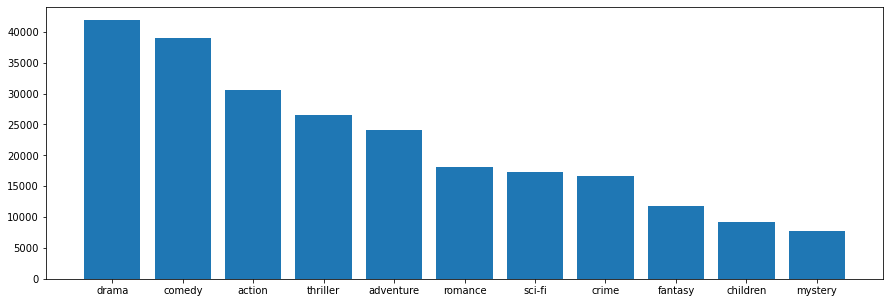

In [135]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(genre_counts_names[:11], genre_counts_values[:11])

In [145]:
tags_df_clean['tag_clean'].value_counts().index.tolist()

['innetflixqueue',
 'atmospheric',
 'thought-provoking',
 'surreal',
 'superhero',
 'funny',
 'disney',
 'sci-fi',
 'religion',
 'quirky',
 'darkcomedy',
 'suspense',
 'psychology',
 'twistending',
 'visuallyappealing',
 'comedy',
 'politics',
 'crime',
 'music',
 'highschool',
 'dark',
 'action',
 'mentalillness',
 'timetravel',
 'mindfuck',
 'aliens',
 'space',
 'dreamlike',
 'blackcomedy',
 'journalism',
 'holocaust',
 'emotional',
 'disturbing',
 'heist',
 'shakespeare',
 'mafia',
 'stephenking',
 'christmas',
 'satire',
 'classic',
 'anime',
 'court',
 'comicbook',
 'animation',
 'adolescence',
 'ghosts',
 'adultery',
 'bittersweet',
 'psychological',
 'boxing',
 'imdbtop250',
 'robots',
 'leonardodicaprio',
 'philosophical',
 'vietnam',
 'england',
 'australia',
 'drugs',
 'cinematography',
 'india',
 'remake',
 'adventure',
 'mystery',
 'murder',
 'stylized',
 'creepy',
 'racism',
 'sexuality',
 'hallucinatory',
 'worldwarii',
 'revenge',
 'willferrell',
 'tense',
 'military',
 

In [147]:
tag_counts_names = tags_df_clean['tag_clean'].value_counts().index
tag_counts_values = tags_df_clean['tag_clean'].value_counts().values

<BarContainer object of 11 artists>

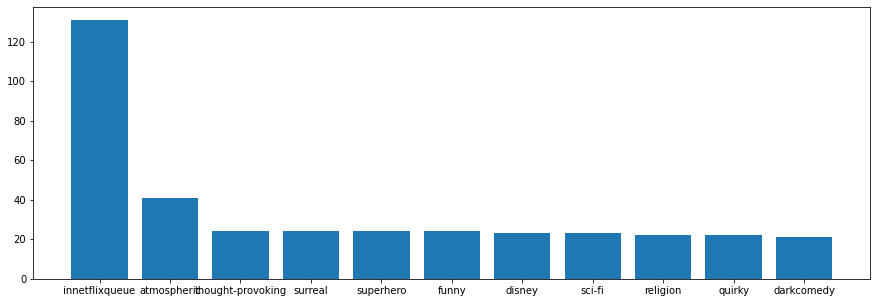

In [149]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(tag_counts_names[:11], tag_counts_values[:11])

## Results/Conclusions

### Further Exploration/Questions

In [13]:
x = [0,1,2,3,4,5]

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

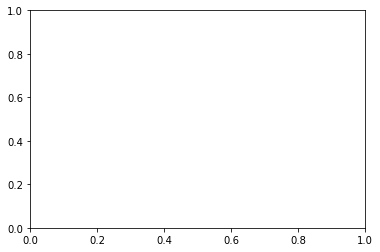

In [16]:
fig, ax = plt.subplots()

plt.plot(x, 1,0)